# Polynomial Regression

In this program,the simple polynomial regression is implemented on the dataset which includes the weather summary of Szeged, Hungary area, between 2006 and 2016. The feature 'Temperature (C)' is considered as the explanatory variable and the feature 'Apparent Temperature (C)' is considered as the response variable. 

STEP - 1: Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

STEP - 2: Loading the dataset and selecting some random data for visualization

In [2]:
data = pd.read_csv('data\weatherHistory.csv')
df = data.sample(n=25)

STEP - 3: Initializing the required variables

In [3]:
X = data[['Temperature (C)']]
Y = data[['Apparent Temperature (C)']]
X_test = df[['Temperature (C)']]
Y_test = df[['Apparent Temperature (C)']]
n = len(X)
Xsq = np.multiply(X,X)
XY = np.multiply(X,Y)
XsqY = np.multiply(Xsq,Y)
Xcb = np.multiply(Xsq, X)
Xp4 = np.multiply(Xcb, X)

STEP - 4: Finding the summations of the variables

In [4]:
X_sum = 0
for i in range(0, n):
    X_sum = X_sum + X.iloc[i,0];
print('Sum of X values =',round(X_sum,4))

Y_sum = 0
for i in range(0, n):
    Y_sum = Y_sum + Y.iloc[i,0];
print('Sum of Y values =',round(Y_sum,4))

Xsq_sum = 0
for i in range(0, n):
    Xsq_sum = Xsq_sum + Xsq.iloc[i,0];
print('Sum of square of X values =',round(Xsq_sum,4))

XY_sum = 0
for i in range(0, n):
    XY_sum = XY_sum + XY.iloc[i,0];
print('Sum of XY values =',round(XY_sum,4))

XsqY_sum = 0
for i in range(0, n):
    XsqY_sum = XsqY_sum + XsqY.iloc[i,0];
print('Sum of XsqY values =',round(XsqY_sum,4))

Xcb_sum = 0
for i in range(0, n):
    Xcb_sum = Xcb_sum + Xcb.iloc[i,0];
print('Sum of Xcb values =',round(Xcb_sum,4))

Xp4_sum = 0
for i in range(0, n):
    Xp4_sum = Xp4_sum + Xp4.iloc[i,0];
print('Sum of Xp4 values =',round(Xp4_sum,4))

Sum of X values = 1150942.6333
Sum of Y values = 1047000.1
Sum of square of X values = 22533340.7875
Sum of XY values = 22275511.7675
Sum of XsqY values = 483062776.0404
Sum of Xcb values = 486797690.9759
Sum of Xp4 values = 11804185261.3151


STEP - 5: Computing the values of B0 & B1

In [5]:
# Declaring and assigning Array 1
arr1 = [[0 for x in range(3)] for y in range(1)]
arr1[0][0] = Y_sum
arr1[0][1] = XY_sum
arr1[0][2] = XsqY_sum

# Declaring and assigning Array 2
arr2 = [[0 for x in range(3)] for y in range(3)]
arr2[0][0] = n
arr2[0][1] = X_sum
arr2[0][2] = Xsq_sum
arr2[1][0] = X_sum
arr2[1][1] = Xsq_sum
arr2[1][2] = Xcb_sum
arr2[2][0] = Xsq_sum
arr2[2][1] = Xcb_sum
arr2[2][2] = Xp4_sum

# Finding the inverse of Array 2 and 
# Initializing it as Array 3
arr3 = np.linalg.inv(arr2) 

# Finding the product of Array 1 & Array 3
arr = np.dot(arr1,arr3)

# Initializing B0 B1 & B2
B0 = arr[0][0]
B1 = arr[0][1]
B2 = arr[0][2]

# Printing the results
print('The value of B0 is', round(B0, 4))
print('The value of B1 is', round(B1, 4))
print('The value of B2 is', round(B2, 4))
print("\nRegression Line: Y = (",round(B2, 4),") x^2 + (",round(B1, 4),") x + (",round(B1, 4),")")

The value of B0 is -2.6147
The value of B1 is 1.1936
The value of B2 is -0.0033

Regression Line: Y = ( -0.0033 ) x^2 + ( 1.1936 ) x + ( 1.1936 )


STEP - 6: Predicting the Y values

In [6]:
Y_new = B2*Xsq + B1*X + B0

STEP - 7: Visualization

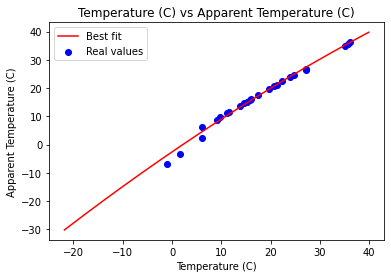

In [7]:
plt.scatter(X_test, Y_test, color = 'blue', label = 'Real values')
plt.plot(X, Y_new, color = 'red', label = 'Best fit')
plt.title('Temperature (C) vs Apparent Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.show()

STEP - 8: Finding Mean Square Error:

In [8]:
Error = pd.DataFrame()
Error['Err'] = Y['Apparent Temperature (C)'].sub(Y_new['Temperature (C)'], axis = 0)
Error['Error_Sq'] = np.power((Error['Err']),2)
SSE = 0
for i in range(0, n):
    SSE = SSE + Error.iloc[i,1];
Mean_SE = SSE / n
print('Mean Squared Error =', round(Mean_SE, 4))

Mean Squared Error = 1.551
